# Shopify DataScience Intership Challenge

## Question 1: 
Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b. What metric would you report for this dataset?

c.What is its value?


In [43]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Reading file and preparing dataframe
cols = ['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items', 
        'payment_method', 'created_at']

df = pd.read_csv('./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', names=cols, na_values = "?",
                 comment = '\t', sep =",", skiprows = 1)

data = df.copy()
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [45]:
total_amount = data['order_amount'].sum()
number_of_orders = len(data)
AOV = total_amount/number_of_orders
AOV



3145.128

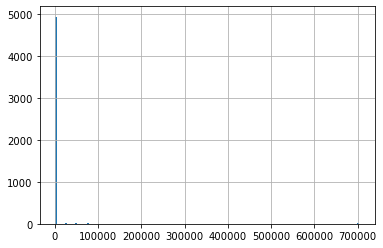

In [46]:
hist = data['order_amount'].hist(bins=150)

<AxesSubplot:>

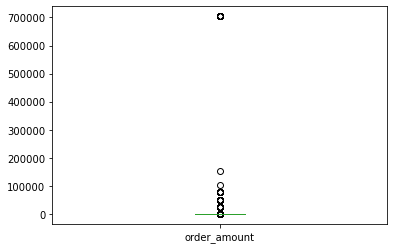

In [47]:
data['order_amount'].plot(kind = 'box')

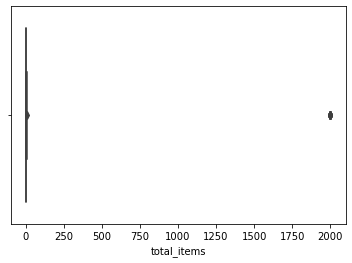

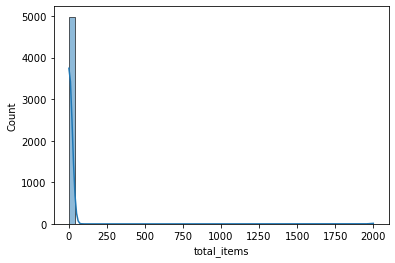

In [94]:
#What about number of items per order
sns.boxplot(x=data['total_items'])
plt.show()
sns.histplot(x=data['total_items'], kde= True, bins=50)
plt.show()

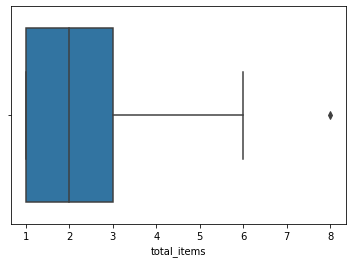

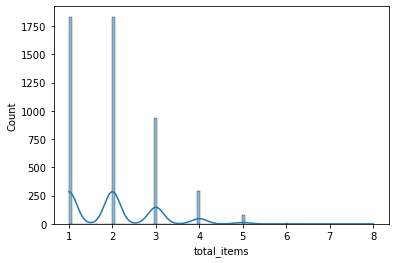

For the cut value: 9, the AOV =754.0919125025085


In [105]:
cut_value = 9
data2 = df[df['total_items'] < cut_value]
sns.boxplot(x=data2['total_items'])
plt.show()
sns.histplot(x=data2['total_items'], kde= True, bins=100)
plt.show()
total_amount = data2['order_amount'].sum()
number_of_orders = len(data2)
AOV = total_amount/number_of_orders
print("For the cut value: " + str(cut_value) +", the AOV ="+ str(AOV))

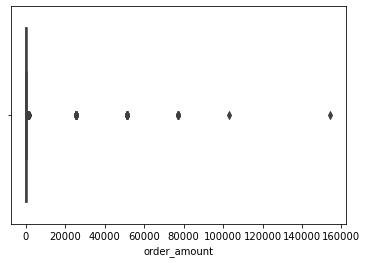

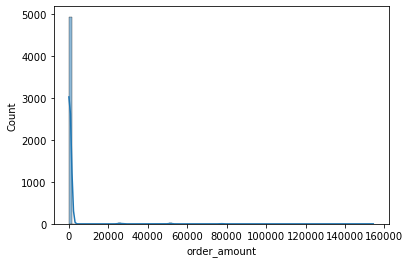

In [107]:
sns.boxplot(x=data2['order_amount'])
plt.show()
sns.histplot(x=data2['order_amount'], kde= True, bins=100)
plt.show()

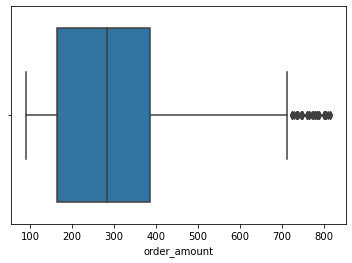

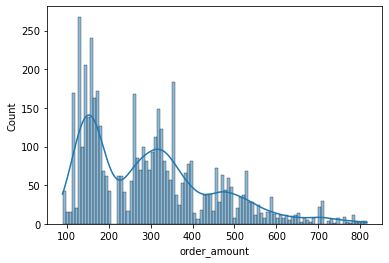

For the cut value: 820, the AOV =298.5010187449063


In [108]:
cut_value = 820
data3 = df[df['order_amount'] < cut_value]
sns.boxplot(x=data3['order_amount'])
plt.show()
sns.histplot(x=data3['order_amount'], kde= True, bins=100)
plt.show()
total_amount = data3['order_amount'].sum()
number_of_orders = len(data3)
AOV = total_amount/number_of_orders
print("For the cut value: " + str(cut_value) +", the AOV ="+ str(AOV))

In [109]:
data['order_amount'].median()

284.0

# Final idea:
use the median and give a comment about the super outlier, he should be treated different.